In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [103]:
train = pd.read_csv("./bike/train.csv", parse_dates=['datetime'])
test = pd.read_csv("./bike/test.csv", parse_dates=['datetime'])

In [104]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [105]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [108]:
### 01. 데이터 날짜는 언제부터 언제까지 데이터일까?
##test : 2011.01.20~2012.12.31

test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [109]:
test.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6483,2012-12-31 14:00:00,1,0,1,2,11.48,13.635,45,15.0013
6484,2012-12-31 15:00:00,1,0,1,2,11.48,14.395,45,8.9981
6485,2012-12-31 16:00:00,1,0,1,2,10.66,12.880,48,12.9980
6486,2012-12-31 17:00:00,1,0,1,2,10.66,14.395,48,6.0032
6487,2012-12-31 18:00:00,1,0,1,2,10.66,13.635,48,8.9981
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [110]:
### 01. 데이터 날짜는 언제부터 언제까지 데이터일까?
##train : 2011.01.01~2012.12.19

train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [111]:
train.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [112]:
###02. 실제 빌린 대수(count)와 다른 정보간의 관계는 어떤 관계가 있을까?
####count와 temp의 관계 : 날이 추울수록 빌리지 않는다(?)

In [113]:
###03. count와 다른 변수간의 관계 확인 - corr() 상관계수
####가장 높은 상관관계를 갖는 순서로 정렬시켜보자.(pandas)
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [114]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [115]:
### 상관관계 : https://www.scienceall.com/%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98coefficient-of-correlation-correlation-coefficient/
####상관관계는 0에 가까울수록 낮고, +1이나 -1에 가까울수록 높다.

### 상관관계 내림차순 정렬 : https://9566.tistory.com/51
#### ascending=True : 오름차순 정렬, ascending=False : 내림차순 정렬


t=train.corr()['count']
t.sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

In [116]:
### 절댓값 : https://wikidocs.net/151836
#### +1또는 -1에 가까우면 상관관계가 높으므로, 절댓값을 위해서 abs()

t.abs().sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
humidity      0.317371
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

Text(0, 0.5, 'index')

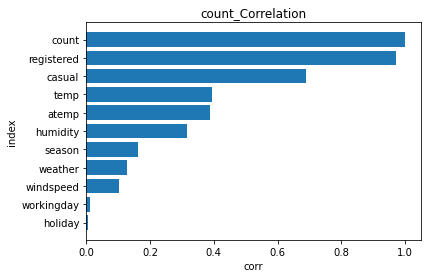

In [117]:
#### 이를 수평 막대 그래프로 표시해 보자.
### 상관관계가 높은게 위로 가야하므로 ascending=True
#### x축, y축 레이블, 제목을 표시해보자

t_corr = t.abs().sort_values(ascending=True)

plt.barh(t_corr.index, t_corr.values)
plt.title("count_Correlation")
plt.xlabel("corr")
plt.ylabel("index")

In [118]:
### 04. 계절별 데이터는 어떤 패턴을 가질까?
#### season 특징(정보) 확인해 보기
### https://jimmy-ai.tistory.com/226 (season만 추출)

#### 계절별 데이터를 확인 및 시각화 해 보자.

#### x축을 1,2,3,4만 표시되도록 하자. <모르겠습니다..>

train['season']

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: int64

<BarContainer object of 10886 artists>

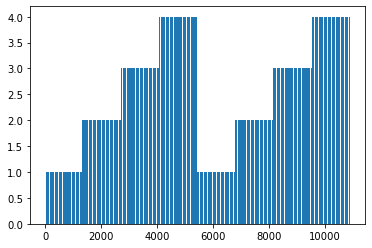

In [119]:
s=train['season']
plt.bar(s.index, s.values)

In [120]:
### 05. 쉬는날과 쉬는 날이 아닌 데이터는 어떤 패턴을 가질까?
#### holiday의 값의 종류와 count를 확인해 보기

## holiday : workingday
## 1 : 0  =  공휴일
## 0 : 1  =  평일
## 0 : 0  =  주말

#### 값의 종류와 갯수 : value_counts()

train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<BarContainer object of 2 artists>

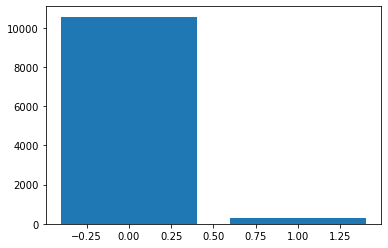

In [121]:
#### holiday의 값의 종류와 count 시각화

t_h = train['holiday'].value_counts()

plt.bar(t_h.index, t_h.values)

In [122]:
### 06. weather는 어떤 값을 갖고, 각각의 데이터의 수는 얼마나 될까?
#### weather의 값의 종류와 count를 확인해 보기

train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<BarContainer object of 4 artists>

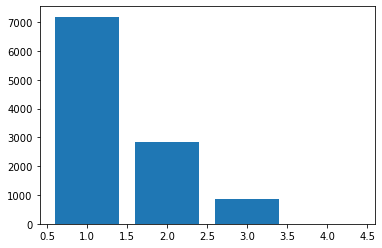

In [123]:
t_w=train['weather'].value_counts()
plt.bar(t_w.index, t_w.values)

Text(572.9, 0.5, 'frequency')

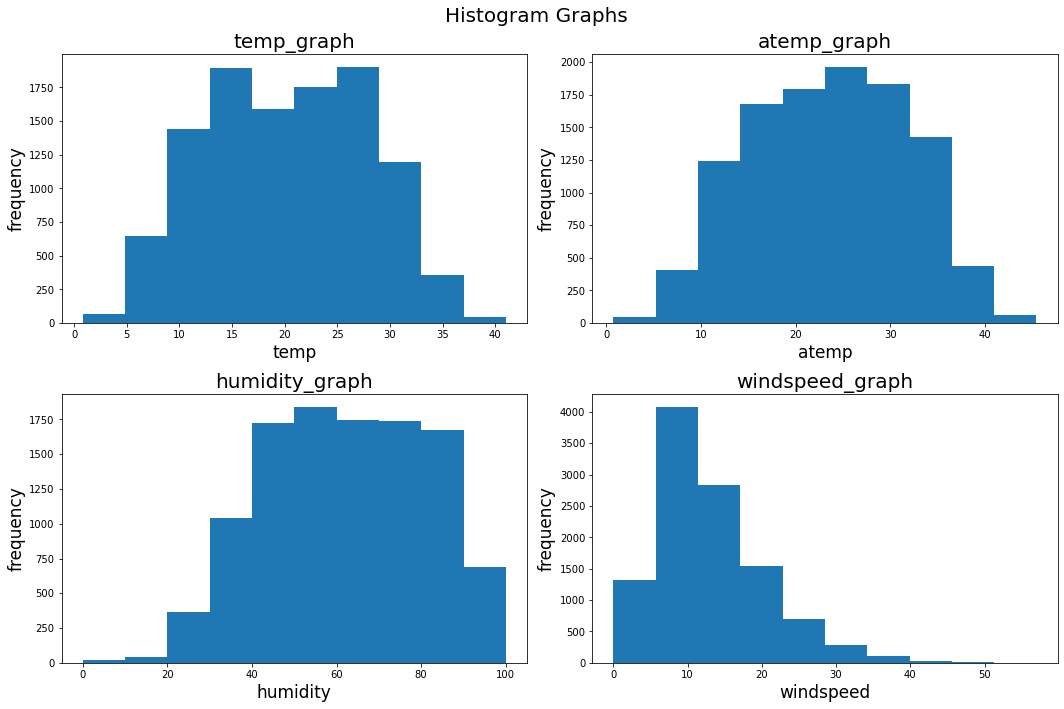

In [124]:
### 06. 아래의 값의 분포를 2행, 2열로 표시해 보자.
#### temp의 값의 분포는 어떠할까?
#### atemp의 값의 분포는 어떠할까?
#### humidity의 값의 분포는 어떠할까?
#### windspeed의 값의 분포는 어떠할까?

#### 전체 그래프에 대한 제목을 달아보자(suptitle, 크기(size)=20) )
#### 각각의 그래프에 대한 x축 레이블을 넣어보자(크기는 17)
#### 시각화 해보기(matplotlib 활용)

### 분포를 한눈에 보기 좋은 그래프 : 히스토그램 그래프    (form. 구글)

plt.figure(figsize=(15, 10))

plt.suptitle("Histogram Graphs", size=20)

plt.subplot(2,2,1)
plt.tight_layout()       #그래프끼리 간격때문에 글씨가 겹쳐서 썼습니다.
plt.hist(train.temp)     #기온
plt.title('temp_graph', size=20)
plt.xlabel('temp', size=17)
plt.ylabel('frequency', size=17)

plt.subplot(2,2,2)
plt.tight_layout()
plt.hist(train.atemp)    #체감온도
plt.title('atemp_graph', size=20)
plt.xlabel('atemp', size=17)
plt.ylabel('frequency', size=17)

plt.subplot(2,2,3)
plt.tight_layout()
plt.hist(train.humidity)   #습도
plt.title('humidity_graph', size=20)
plt.xlabel('humidity', size=17)
plt.ylabel('frequency', size=17)

plt.subplot(2,2,4)
plt.tight_layout()
plt.hist(train.windspeed)    #바람의 세기(풍속)
plt.title('windspeed_graph', size=20)
plt.xlabel('windspeed', size=17)
plt.ylabel('frequency', size=17)